In [3]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/The Impacts of Working Remotely and in an Office Survey.csv')


print(df.head())
df.fillna('Unknown', inplace=True)


   Response ID Have you ever experienced working from home?  \
0            1                                          Yes   
1            2                                          Yes   
2            3                                           No   
3            4                                          Yes   
4            5                                          Yes   

  Do you think that working from home increases your work productivity?  \
0                                                 No                      
1                                                Yes                      
2                                                Yes                      
3                                                Yes                      
4                                                 No                      

  Do you think that working from home prevents you from going out?  \
0                                                Yes                 
1                             

In [4]:
#EDA
# Summary statistics
print(df.describe(include='all'))

# Count the number of responses for each categorical variable
for column in df.columns:
    print(f"Distribution of {column}:")
    print(df[column].value_counts())
    print()


        Response ID Have you ever experienced working from home?  \
count    100.000000                                          100   
unique          NaN                                            2   
top             NaN                                          Yes   
freq            NaN                                           60   
mean      50.500000                                          NaN   
std       29.011492                                          NaN   
min        1.000000                                          NaN   
25%       25.750000                                          NaN   
50%       50.500000                                          NaN   
75%       75.250000                                          NaN   
max      100.000000                                          NaN   

       Do you think that working from home increases your work productivity?  \
count                                                 100                      
unique                 

In [6]:
#Correlation Analysis
df_numerical = df.replace({'Yes': 1, 'No': 0, 'Unknown': np.nan})

# Select only numeric columns for correlation analysis
numeric_cols = df_numerical.select_dtypes(include=[np.number]).columns
df_numerical = df_numerical[numeric_cols]

# Compute correlations
correlations = df_numerical.corr()

print("Correlation matrix:")
print(correlations)


Correlation matrix:
                                                    Response ID  \
Response ID                                            1.000000   
Have you ever experienced working from home?          -0.035357   
Do you think that working from home increases y...     0.045358   
Do you think that working from home prevents yo...     0.076353   
Do you think that working from home gives you m...          NaN   
Do you think that working from home saves you m...    -0.016971   
Do you think that working from home prevents yo...     0.078621   

                                                    Have you ever experienced working from home?  \
Response ID                                                                            -0.035357   
Have you ever experienced working from home?                                            1.000000   
Do you think that working from home increases y...                                      0.089087   
Do you think that working from home prevent

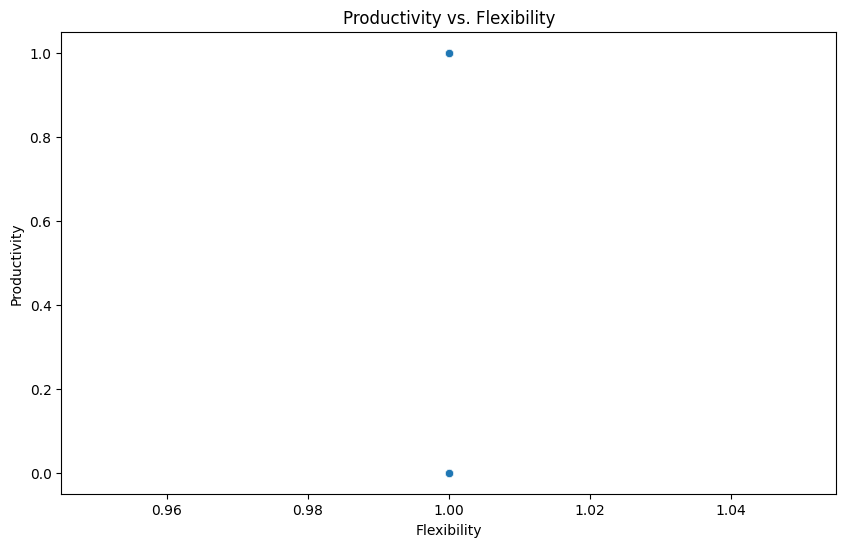

In [7]:
#Visualization Productivity Vs. Flexibility
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Do you think that working from home gives you more flexibility?',
                y='Do you think that working from home increases your work productivity?',
                data=df_numerical)
plt.title('Productivity vs. Flexibility')
plt.xlabel('Flexibility')
plt.ylabel('Productivity')
plt.show()


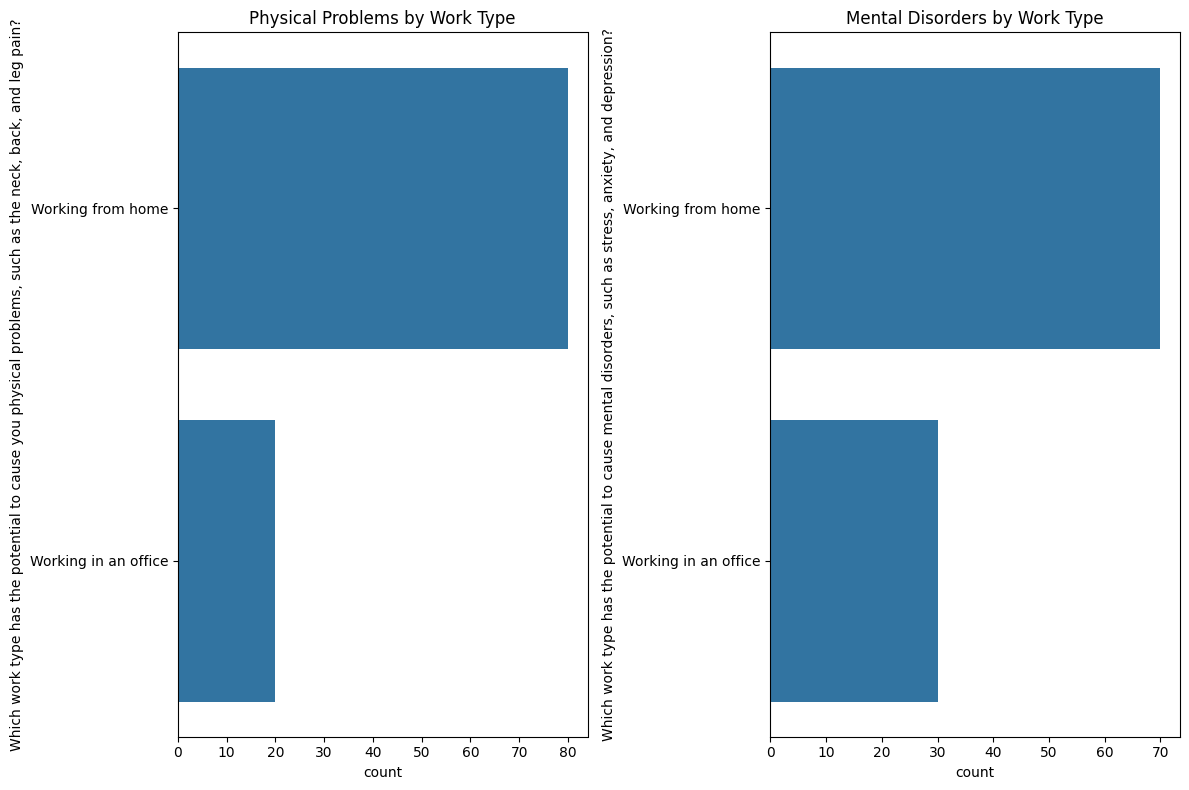

In [8]:
# Visualizing physical and mental health issues by work type
plt.figure(figsize=(12, 8))

# Physical problems
plt.subplot(1, 2, 1)
sns.countplot(y='Which work type has the potential to cause you physical problems, such as the neck, back, and leg pain?',
              data=df)
plt.title('Physical Problems by Work Type')

# Mental disorders
plt.subplot(1, 2, 2)
sns.countplot(y='Which work type has the potential to cause mental disorders, such as stress, anxiety, and depression?',
              data=df)
plt.title('Mental Disorders by Work Type')

plt.tight_layout()
plt.show()


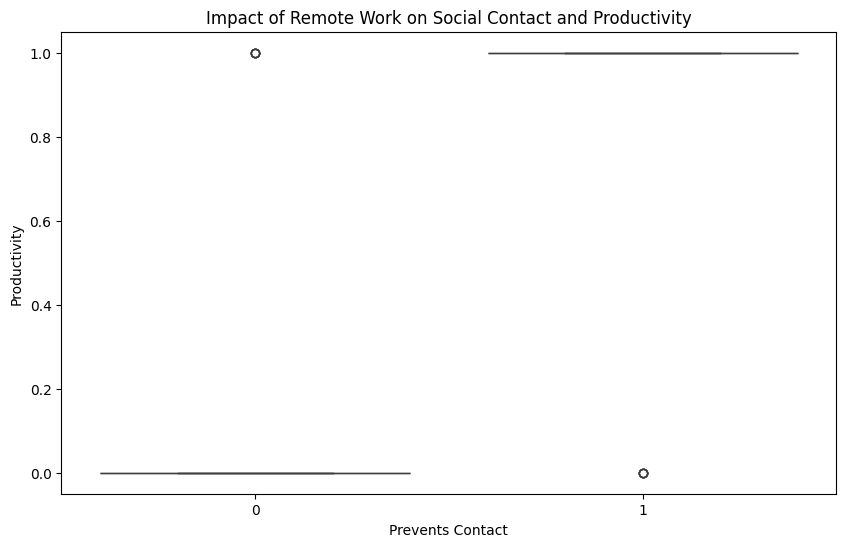

In [9]:
#Social interaction impact
# Compare the perceived impact of remote work on social contact with productivity
plt.figure(figsize=(10, 6))
sns.boxplot(x='Do you think that working from home prevents you from getting in contact with people?',
            y='Do you think that working from home increases your work productivity?',
            data=df_numerical)
plt.title('Impact of Remote Work on Social Contact and Productivity')
plt.xlabel('Prevents Contact')
plt.ylabel('Productivity')
plt.show()


Bar Plot Analysis:
Frequency Distribution of Preferred Work Types:
Which work type do you prefer the most?
A mixed mode of working    50
Working in an office       30
Working from home          20
Name: count, dtype: int64

Work Type: A mixed mode of working
Frequency: 50

Work Type: Working in an office
Frequency: 30

Work Type: Working from home
Frequency: 20


<ipython-input-17-e53aef3f8bd8>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bar_plot_summary.index, y=bar_plot_summary.values, palette='viridis')


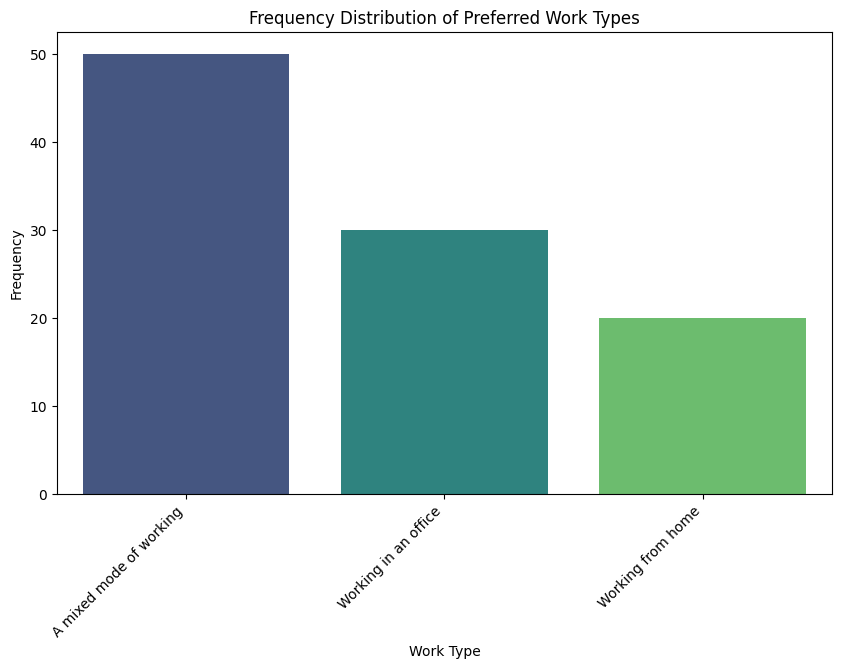

In [17]:
bar_plot_summary = df['Which work type do you prefer the most?'].value_counts()

print("Bar Plot Analysis:")
print("Frequency Distribution of Preferred Work Types:")
print(bar_plot_summary)

for work_type, count in bar_plot_summary.items():
    print(f"\nWork Type: {work_type}")
    print(f"Frequency: {count}")

# Create and show the bar plot
plt.figure(figsize=(10, 6))
bar_width = 0.2
sns.barplot(x=bar_plot_summary.index, y=bar_plot_summary.values, palette='viridis')
plt.title('Frequency Distribution of Preferred Work Types')
plt.xlabel('Work Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()